In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import xarray as xr
import torch
from torch.utils.data import Dataset
import os
import pandas as pd
from typing import List
import numpy as np
import cmocean

import DeepFate

from DeepFate import config

import torch
from torch.utils.data import DataLoader

from tqdm import tqdm

/home/b/b381993/miniconda3/envs/pytorch2/lib/python3.8/site-packages/xarray/backends/cfgrib_.py:29: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
from DeepFate.datasets.load_toocan_dyamond import load_TOOCAN_DYAMOND
list_mcs_object = load_TOOCAN_DYAMOND(DeepFate.config.PATH_TOOCAN_GLOBAL_FILE)

In [3]:
print(DeepFate.config.PATH_TOOCAN_GLOBAL_FILE)

/work/bb1153/b381993/data3/data/new_TOOCAN-GLOBAL-20160901-20160910.dat.gz


In [4]:
from DeepFate.datasets.utils import get_list_valid_mcs
list_valid_mcs = get_list_valid_mcs(list_object_mcs = list_mcs_object,
                   max_area=40000,
                    min_area=DeepFate.config.MCS_SPECS_RANGE['max_area'][0],
                    duration_max = 100,
                    duration_min = 3,
                    lat_max=DeepFate.config.MAX_LAT_TROPICS)

100%|██████████| 63383/63383 [00:00<00:00, 102802.74it/s]


In [5]:
from DeepFate.datasets.utils import get_validity_lifecycles_start_end

In [6]:
validitity, start_times, end_times = get_validity_lifecycles_start_end(list_valid_mcs)
list_valid_mcs_2 = [list_valid_mcs[i] for i in range(len(list_valid_mcs)) if validitity[i] is True]
list_start_times = [start_times[i] for i in range(len(list_valid_mcs)) if validitity[i] is True]
list_end_times = [end_times[i] for i in range(len(list_valid_mcs)) if validitity[i] is True]

100%|██████████| 41302/41302 [00:01<00:00, 23199.75it/s]


In [7]:
import pandas as pd
pd.read_csv('/home/b/b381993/DeepDyamond/experiments/grid_search/10_MAY_results_config_grid_search.csv')

,Unnamed: 0,index,width_multiplier,use_ds_conv,kernel_size_list,stride_list,NbParameters,VAL_LOSS_epoch_1,VAL_LOSS_epoch_2,VAL_LOSS_epoch_3,...,VAL_LOSS_epoch_17,VAL_LOSS_epoch_18,VAL_LOSS_epoch_19,VAL_LOSS_epoch_20,VAL_LOSS_epoch_21,VAL_LOSS_epoch_22,VAL_LOSS_epoch_23,VAL_LOSS_epoch_24,VAL_LOSS_epoch_25,TrainingTime
0,0,1,1.0,False,"[(2, 2, 2), (2, 2, 2), (2, 2, 2), (3, 2, 2)]","[(1, 2, 2), (1, 2, 2), (1, 2, 2), (1, 2, 2)]",23111553.0,0.930,0.907,0.901,...,0.878,0.878,0.878,0.878,0.878,0.877,0.877,0.877,0.877,6631.614904
1,1,2,1.0,False,"[(1, 2, 2), (1, 2, 2), (3, 2, 2), (4, 2, 2)]","[(1, 2, 2), (1, 2, 2), (1, 2, 2), (1, 2, 2)]",23725953.0,0.927,0.912,0.902,...,0.877,0.877,0.877,0.877,0.877,0.877,0.877,0.876,0.876,6645.277373
2,2,3,1.0,False,"[(3, 4, 4), (1, 2, 2), (1, 2, 2), (1, 2, 2)]","[(3, 4, 4), (1, 2, 2), (1, 2, 2), (1, 2, 2)]",21981057.0,0.938,0.927,0.921,...,0.890,0.890,0.890,0.890,0.890,0.890,0.890,0.890,0.890,6445.455672
3,3,4,1.0,False,"[(1, 4, 4), (1, 4, 4), (1, 2, 2), (1, 1, 1)]","[(1, 4, 4), (1, 4, 4), (1, 2, 2), (1, 1, 1)]",21620609.0,0.939,0.929,0.922,...,0.885,0.884,0.884,0.884,0.884,0.884,0.884,0.885,0.884,6462.620659
4,4,5,1.0,False,"[(2, 4, 4), (2, 3, 3), (2, 2, 2), (2, 2, 2)]","[(1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1)]",22718337.0,0.944,0.932,0.925,...,0.899,0.899,0.899,0.899,0.899,0.899,0.898,0.899,0.899,14945.226240
5,5,6,1.0,False,"[(1, 4, 4), (1, 4, 4), (3, 2, 2), (4, 1, 1)]","[(1, 4, 4), (1, 4, 4), (1, 2, 2), (1, 1, 1)]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,7,2.0,False,"[(2, 2, 2), (2, 2, 2), (2, 2, 2), (3, 2, 2)]","[(1, 2, 2), (1, 2, 2), (1, 2, 2), (1, 2, 2)]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,8,0.5,False,"[(2, 2, 2), (2, 2, 2), (2, 2, 2), (3, 2, 2)]","[(1, 2, 2), (1, 2, 2), (1, 2, 2), (1, 2, 2)]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,9,1.0,True,"[(1, 2, 2), (1, 2, 2), (1, 2, 2), (1, 2, 2)]","[(1, 2, 2), (1, 2, 2), (1, 2, 2), (1, 2, 2)]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
len(list_mcs_object), len(list_valid_mcs)

(63383, 41302)

In [9]:
#import matplotlib
#matplotlib.rcParams['mathtext.fontset'] = 'stix'
#matplotlib.rcParams['font.family'] = 'STIXGeneral'
#plt.rcParams.update({'font.size': 18})

In [10]:
from DeepFate.datasets.utils import get_single_validity_idx_start_idx_end
idx_mcs=150
mcs_object = list_mcs_object[idx_mcs]
valid, idx_start, idx_end = get_single_validity_idx_start_idx_end(mcs_object, rolling_window=4, gradient_threshold=400, fraction_max_end=0.5, fraction_max_start=0.5)


In [11]:
idx_not_none = np.where(np.array(start_times)!=None)[0]

In [12]:
np.argmax(np.array(start_times)[idx_not_none])

1750

In [13]:
start_no_none = [start_times[i] if start_times[i]!=None else -1 for i in range(len(start_times))]

end_no_none = [end_times[i] if end_times[i]!=None else -1 for i in range(len(end_times))]


In [14]:
np.argmax(start_no_none), np.argmax(end_no_none)

(2440, 36230)

In [15]:
idx = np.where(np.array(validitity)==False)[0]

In [16]:
#idx = np.where(np.array(validitity)==False)[0][100:150]

In [17]:
%matplotlib inline

Text(0, 0.5, 'Surface [km$^2$]')

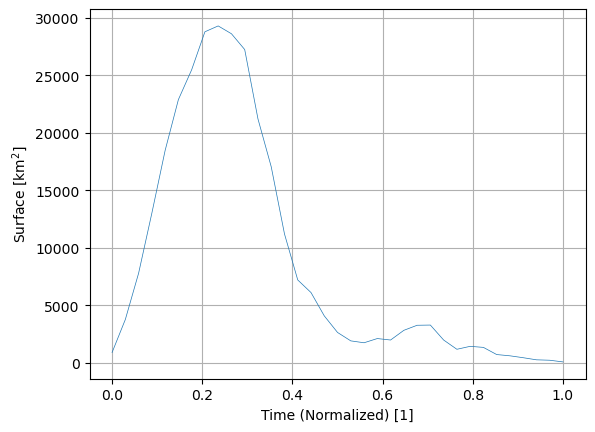

In [18]:
ii=0
for idx_mcs in [162]:
    ii=ii+1
    mcs_object = list_mcs_object[idx_mcs]
    #valid, idx_start, idx_end = get_single_validity_idx_start_idx_end(mcs_object, rolling_window=4, gradient_threshold=400, fraction_max_end=0.5, fraction_max_start=0.5)

    nt = len(mcs_object.clusters.LC_surfkm2_235K)
    plt.plot(np.linspace(0,1,nt), mcs_object.clusters.LC_surfkm2_235K, '-', linewidth=0.5, label=ii)
    #plt.plot(np.linspace(0,1,nt)[idx_start:idx_end], mcs_object.clusters.surfkm2_172Wm2[idx_start:idx_end], '-o')
plt.grid(True)
plt.xlabel('Time (Normalized) [1]')
plt.ylabel(r'Surface [km$^2$]')
#plt.title('Surface Evolution in Time')
#plt.legend()
    
    

In [19]:
#import matplotlib
#matplotlib.rcParams['mathtext.fontset'] = 'stix'
#matplotlib.rcParams['font.family'] = 'STIXGeneral'
#plt.rcParams.update({'font.size': 30})

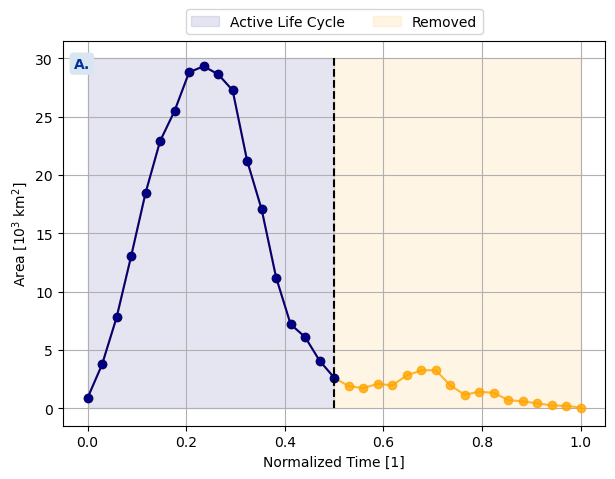

In [38]:
ii=0
fig, ax = plt.subplots(figsize=(7,5))
for idx_mcs in [162]:
    ii=ii+1
    mcs_object = list_mcs_object[idx_mcs]
    valid, idx_start, idx_end = get_single_validity_idx_start_idx_end(mcs_object, rolling_window=4, gradient_threshold=600, fraction_max_end=0.5, fraction_max_start=0.5)

    nt = len(mcs_object.clusters.LC_surfkm2_235K)
    plt.plot(np.linspace(0,1,nt), np.array(mcs_object.clusters.LC_surfkm2_235K)/1000, '-o', color='orange', alpha=0.8)
    plt.plot(np.linspace(0,1,nt)[idx_start:idx_end], np.array(mcs_object.clusters.LC_surfkm2_235K[idx_start:idx_end])/1000, '-o', color='navy')
    
    plt.vlines(np.linspace(0,1,nt)[idx_end-1], 0,30, ls='--', color='k')
    
    
    plt.fill_between(np.linspace(0,1,nt)[:idx_end],0,30, alpha=0.1,  color='navy', label='Active Life Cycle')
    plt.fill_between(np.linspace(0,1,nt)[idx_end-1:],0,30, alpha=0.1,  color='orange', label='Removed')

    
    
    
plt.grid(True)
plt.xlabel('Normalized Time [1]')
plt.ylabel(r'Area [$10^3$ km$^2$]')
#plt.title('Surface Evolution in Time')
plt.legend(ncol=2, bbox_to_anchor=(0.5,1.1), loc= 'upper center')

# Assuming you have your axes already created as ax1, ax2, and ax3
labels = ['A.']
pnas_bg_color = '#d9e6f2'  # PNAS light blue color for background
pnas_text_color = '#0033a0'  # PNAS dark blue color for text

ax.text(
    0.02, 0.93, labels[0], 
    transform=ax.transAxes, 
    weight='bold',
    color=pnas_text_color,  # Text color
    bbox=dict(facecolor=pnas_bg_color, edgecolor='none', boxstyle='round,pad=0.3')  # Background color with padding
)
    
plt.savefig('active_life_cycle.pdf', bbox_inches='tight')

In [31]:
from DeepFate.datasets.utils import get_single_validity_idx_start_idx_end, get_validity_lifecycles_start_end


In [32]:
validity_list, idx_start_list, idx_end_list = get_validity_lifecycles_start_end(list_valid_mcs)

100%|██████████| 34617/34617 [00:01<00:00, 21694.32it/s]


In [33]:
list_valid_mcs = get_list_valid_mcs(list_object_mcs = list_mcs_object,
                   max_area=DeepFate.config.MCS_SPECS_RANGE['max_area'][1],
                    min_area=DeepFate.config.MCS_SPECS_RANGE['max_area'][0],
                    duration_max = DeepFate.config.MCS_SPECS_RANGE['duration_hour'][1],
                    duration_min = DeepFate.config.MCS_SPECS_RANGE['duration_hour'][0],
                    lat_max=DeepFate.config.MAX_LAT_TROPICS)

validitity, start_times, end_times = get_validity_lifecycles_start_end(list_valid_mcs)
list_valid_mcs_2 = [list_valid_mcs[i] for i in range(len(list_valid_mcs)) if validitity[i] is True]
list_start_times = [start_times[i] for i in range(len(list_valid_mcs)) if validitity[i] is True]
list_end_times = [end_times[i] for i in range(len(list_valid_mcs)) if validitity[i] is True]

100%|██████████| 34617/34617 [00:01<00:00, 22800.10it/s]


In [34]:

list_rolling_window = [1, 2, 3, 4, 5, 6]
list_gradient_threshold = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

correl_list =[]
remove_list=[]
rolling=4
for gradient_thresholf in list_gradient_threshold:
    validity_list, idx_start_list, idx_end_list = get_validity_lifecycles_start_end(list_valid_mcs, rolling_window=rolling, gradient_threshold=gradient_thresholf,
                                                                                   fraction_max_end=0.4, fraction_max_start=0.5)
    
    
    
    duration_list = [(idx_end_list[i] - idx_start_list[i])*0.5 for i in range(len(validity_list)) if validity_list[i]]
    area_max_list = [np.sqrt(np.max(list_valid_mcs[i].clusters.LC_surfkm2_235K)) for i in range(len(validity_list)) if validity_list[i]]
    df = pd.DataFrame.from_dict({'duration':duration_list, 'maximal_extension':area_max_list})
    #list_corrle.append(df.corr()['duration']['maximal_extension'])

    proportion_remove = (len(validity_list)-np.sum(np.array(validity_list)*1))/len(validity_list)

    remove_list.append(proportion_remove)
    correl_list.append(df.corr()['duration']['maximal_extension'])
    


100%|██████████| 34617/34617 [00:01<00:00, 22091.44it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


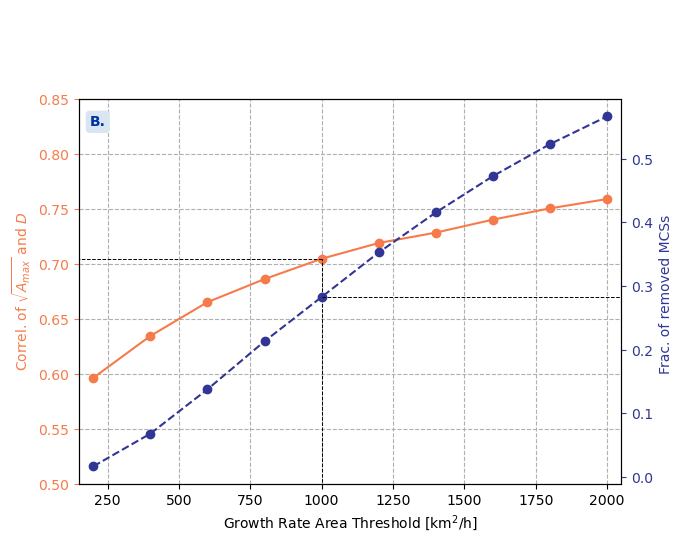

In [36]:
fig, ax = plt.subplots(figsize=(7,5))

ax2=plt.twinx(ax)

color2=plt.get_cmap('RdYlBu', 10)(0.9)
ax2.tick_params(axis='y', colors=color2)
ax2.yaxis.label.set_color(color2)

color=plt.get_cmap('RdYlBu', 10)(0.2)
ax.tick_params(axis='y', colors=color)
ax.yaxis.label.set_color(color)

ax.plot(2*np.array(list_gradient_threshold), correl_list, '-o', color=color, )
ax2.plot(2*np.array(list_gradient_threshold), remove_list, '--o', color=color2, )

ax.plot([0,1], [0,1], alpha=0, label=' ', )
ax.plot([0,1], [0,1], alpha=0, label=' ', )



ax.grid(True,'both', ls='--')

idx_threshold=4
ax.vlines(2*list_gradient_threshold[idx_threshold], 0.40,correl_list[idx_threshold], color='k', ls='--', linewidth=0.7)
ax.hlines(correl_list[idx_threshold], 2*list_gradient_threshold[idx_threshold],2*list_gradient_threshold[0]-100, color='k', ls='--', linewidth=0.7)
ax2.hlines(remove_list[idx_threshold], 2*list_gradient_threshold[idx_threshold],2*list_gradient_threshold[-1]+100, color='k', ls='--', linewidth=0.7)





plt.xlabel('threshold in dadt')
ax2.set_ylabel(r'Frac. of removed MCSs ')
ax.set_ylabel(r'Correl. of $\sqrt{A_{max}}$ and $D$')
#ax.set_ylim(0.5, 0.75)
ax.set_ylim(0.5, 0.85)

#ax2.set_ylim(0.1, 1)
ax.set_xlabel('Growth Rate Area Threshold [km$^2$/h]')
ax.set_xlim(150,2050)

plt.legend(ncol=2, bbox_to_anchor=(0.5,1.25), loc= 'upper center', edgecolor='none')

# Assuming you have your axes already created as ax1, ax2, and ax3
labels = ['B.']
pnas_bg_color = '#d9e6f2'  # PNAS light blue color for background
pnas_text_color = '#0033a0'  # PNAS dark blue color for text

ax.text(
    0.02, 0.93, labels[0], 
    transform=ax.transAxes, 
    weight='bold',
    color=pnas_text_color,  # Text color
    bbox=dict(facecolor=pnas_bg_color, edgecolor='none', boxstyle='round,pad=0.3')  # Background color with padding
)

plt.savefig('tunning_threshold_growth_rate.pdf', bbox_inches='tight')

In [26]:

list_rolling_window = [1, 2, 3, 4, 5, 6]
list_gradient_threshold = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

list_surf_end_prop = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

correl_list =[]
remove_list=[]
rolling=4
for i_frac,fraction_end in enumerate([0.1, 0.2,0.3, 0.4, 0.5]):
    remove_list.append([])
    correl_list.append([])
    for gradient_thresholf in list_gradient_threshold:
        validity_list, idx_start_list, idx_end_list = get_validity_lifecycles_start_end(list_valid_mcs, rolling_window=rolling, gradient_threshold=gradient_thresholf, fraction_max_end=fraction_end)
        duration_list = [(idx_end_list[i] - idx_start_list[i])*0.5 for i in range(len(validity_list)) if validity_list[i]]
        area_max_list = [np.max(list_valid_mcs[i].clusters.surfkm2_172Wm2) for i in range(len(validity_list)) if validity_list[i]]
        df = pd.DataFrame.from_dict({'duration':duration_list, 'maximal_extension':area_max_list})
        #list_corrle.append(df.corr()['duration']['maximal_extension'])

        proportion_remove = (len(validity_list)-np.sum(np.array(validity_list)*1))/len(validity_list)
        
        remove_list[i_frac].append(proportion_remove)
        correl_list[i_frac].append(df.corr()['duration']['maximal_extension'])
    


100%|██████████| 34617/34617 [00:01<00:00, 20484.74it/s]


AttributeError: 'MCS_Lifecycle' object has no attribute 'surfkm2_172Wm2'

In [ ]:
fig, ax = plt.subplots()
ax2=plt.twinx(ax)

for j in range(len(list_surf_end_prop)-1):
    ax.plot(list_gradient_threshold, correl_list[j], '-o', label=f'{list_surf_end_prop[j]}')
    ax2.plot(list_gradient_threshold, remove_list[j], '--o')
ax.grid(True,'both', ls='--')
idx_threshold=4
#ax.vlines(list_gradient_threshold[idx_threshold], 0.4,correl_list[0][idx_threshold])
#ax.hlines(correl_list[0][idx_threshold], 100,list_gradient_threshold[idx_threshold])
#ax2.hlines(remove_list[0][idx_threshold], list_gradient_threshold[idx_threshold],1000)

plt.xlabel('threshold in dadt')
ax2.set_ylabel('proportion remove mcs')
ax.set_ylabel('correl amax duration')
ax.legend()

ax.set_ylim(0.540, 0.750)

In [ ]:

list_rolling_window = [1, 2, 3, 4, 5, 6]
list_gradient_threshold = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

list_surf_end_prop = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

correl_list =[]
remove_list=[]
rolling=4
for i_frac,fraction_start in enumerate([0.1, 0.2,0.3, 0.4, 0.5]):
    remove_list.append([])
    correl_list.append([])
    for gradient_thresholf in list_gradient_threshold:
        validity_list, idx_start_list, idx_end_list = get_validity_lifecycles_start_end(list_valid_mcs, rolling_window=rolling, gradient_threshold=gradient_thresholf, fraction_max_start=fraction_start)
        duration_list = [(idx_end_list[i] - idx_start_list[i])*0.5 for i in range(len(validity_list)) if validity_list[i]]
        area_max_list = [np.max(list_valid_mcs[i].clusters.surfkm2_172Wm2) for i in range(len(validity_list)) if validity_list[i]]
        df = pd.DataFrame.from_dict({'duration':duration_list, 'maximal_extension':area_max_list})
        #list_corrle.append(df.corr()['duration']['maximal_extension'])

        proportion_remove = (len(validity_list)-np.sum(np.array(validity_list)*1))/len(validity_list)
        
        remove_list[i_frac].append(proportion_remove)
        correl_list[i_frac].append(df.corr()['duration']['maximal_extension'])
    


In [ ]:
fig, ax = plt.subplots()
ax2=plt.twinx(ax)

for j in range(len(list_surf_end_prop)-1):
    ax.plot(list_gradient_threshold, correl_list[j], '-o', label=f'{list_surf_end_prop[j]}')
    ax2.plot(list_gradient_threshold, remove_list[j], '--o')
plt.grid(True)
idx_threshold=4
#ax.vlines(list_gradient_threshold[idx_threshold], 0.4,correl_list[0][idx_threshold])
#ax.hlines(correl_list[0][idx_threshold], 100,list_gradient_threshold[idx_threshold])
#ax2.hlines(remove_list[0][idx_threshold], list_gradient_threshold[idx_threshold],1000)

plt.xlabel('threshold in dadt')
ax2.set_ylabel('proportion remove mcs')
ax.set_ylabel('correl amax duration')
ax.legend()

In [ ]:

list_rolling_window = [1, 2, 3, 4, 5, 6]
list_gradient_threshold = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
correl_matrix = np.zeros((len(list_rolling_window), len(list_gradient_threshold)))

for i, rolling in enumerate(list_rolling_window):
    for j ,gradient_thresholf in enumerate(list_gradient_threshold):
        validity_list, idx_start_list, idx_end_list = get_validity_lifecycles_start_end(list_valid_mcs, rolling_window=rolling, gradient_threshold=gradient_thresholf)
        duration_list = [(idx_end_list[i] - idx_start_list[i])*0.5 for i in range(len(validity_list)) if validity_list[i]]
        area_max_list = [np.max(list_valid_mcs[i].clusters.surfkm2_172Wm2) for i in range(len(validity_list)) if validity_list[i]]
        df = pd.DataFrame.from_dict({'duration':duration_list, 'maximal_extension':area_max_list})
        #list_corrle.append(df.corr()['duration']['maximal_extension'])
        correl_matrix[i,j] = df.corr()['duration']['maximal_extension']


In [95]:
list_rolling_window = [1, 2, 3, 4, 5, 6]
list_gradient_threshold = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
correl_matrix = np.zeros((len(list_rolling_window), len(list_gradient_threshold)))
remove_matrix = np.zeros((len(list_rolling_window), len(list_gradient_threshold)))
for i, rolling in enumerate(list_rolling_window):
    for j ,gradient_thresholf in enumerate(list_gradient_threshold):
        validity_list, idx_start_list, idx_end_list = get_validity_lifecycles_start_end(list_valid_mcs, rolling_window=rolling, gradient_threshold=gradient_thresholf)
        duration_list = [(idx_end_list[i] - idx_start_list[i])*0.5 for i in range(len(validity_list)) if validity_list[i]]
        area_max_list = [np.max(list_valid_mcs[i].clusters.surfkm2_172Wm2) for i in range(len(validity_list)) if validity_list[i]]
        df = pd.DataFrame.from_dict({'duration':duration_list, 'maximal_extension':area_max_list})
        #list_corrle.append(df.corr()['duration']['maximal_extension'])
        correl_matrix[i,j] = df.corr()['duration']['maximal_extension']
        proportion_remove = (len(validity_list)-np.sum(np.array(validity_list)*1))/len(validity_list)
        remove_matrix[i,j] = proportion_remove

100%|██████████| 58901/58901 [00:01<00:00, 31527.01it/s]


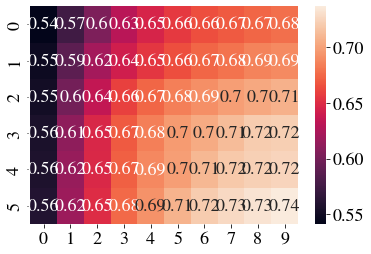

In [96]:
heatmap7=sns.heatmap(correl_matrix, annot=True)

In [97]:
validity_list, idx_start_list, idx_end_list = get_validity_lifecycles_start_end(list_valid_mcs, rolling_window=4, gradient_threshold=500, fraction_max_start=0.4)
duration_list = [(idx_end_list[i] - idx_start_list[i])*0.5 for i in range(len(validity_list)) if validity_list[i]]
area_max_list = [np.max(list_valid_mcs[i].clusters.surfkm2_172Wm2) for i in range(len(validity_list)) if validity_list[i]]
df = pd.DataFrame.from_dict({'duration':duration_list, 'maximal_extension':area_max_list})


100%|██████████| 58901/58901 [00:02<00:00, 24701.39it/s]


In [98]:
#area_max_list = np.sqrt(area_max_list)
df_new = pd.DataFrame.from_dict({'duration':duration_list, 'maximal_extension':area_max_list})


In [101]:
xy = np.vstack([duration_list,area_max_list])
z = gaussian_kde(xy)(xy)
df_new_with_kde = pd.DataFrame.from_dict({'duration':duration_list, 'maximal_extension':area_max_list, 'kde':z})


In [104]:
duration_list, area_max_list = np.array(duration_list), np.array(area_max_list)

[]

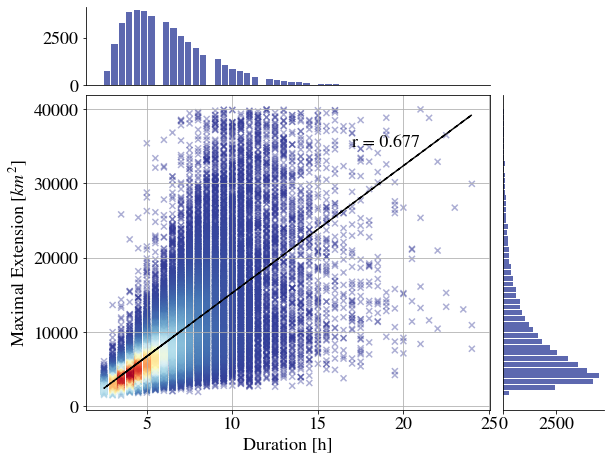

In [111]:
fig = plt.figure(figsize=(9,7))

gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], )#sharex=ax, )
ax_histy = fig.add_subplot(gs[1, 1], )#sharey=ax, )



m, b = np.polyfit(duration_list, area_max_list, 1)

ax.scatter(duration_list, area_max_list, c=z, marker='x', alpha=0.4, cmap='RdYlBu_r')
ax.plot(duration_list, m*duration_list+b, color='k', ls='--')
ax.set_xlabel('Duration [h]')

ax.set_ylabel(r'Maximal Extension [$km^2$]')
r = np.round(df.corr()['duration']['maximal_extension'], 3)
ax.text(17, 35000, f'r = {r}', color='k')
ax.grid(True)

color=plt.get_cmap('RdYlBu')(0.98)

ax_histx.hist(duration_list, bins=50, alpha=0.8, rwidth=0.85, color=color)
ax_histy.hist(area_max_list, bins=50, orientation='horizontal', alpha=0.8, rwidth=0.85, color=color)
ax_histx.spines[['right', 'top']].set_visible(False)
ax_histy.spines[['right', 'top']].set_visible(False)


ax_histx.set_xticks([])
ax_histy.set_yticks([])


#ax.set_xticks(np.linspace(np.min(arr_duration_all), np.max(arr_duration_all), 5))
#ax.set_yticks(np.linspace(np.min(arr_surf_max_all), np.max(arr_surf_max_all), 5))


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

<Figure size 720x504 with 0 Axes>

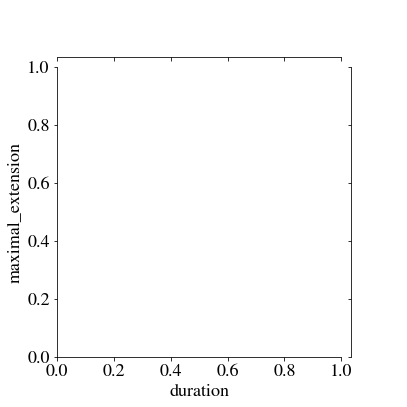

In [100]:
fig = plt.figure(figsize=(10,7))

sns.jointplot(data=df_new, x="duration", y="maximal_extension",kind="reg", marker='x', scatter_kws=dict(alpha=0.4, color='tab:orange'),  marginal_kws=dict(bins=30), line_kws={"color": "orange", "linestyle":"--"})

r = np.round(df_new.corr()['duration']['maximal_extension'], 3)
plt.text(18, 40000, f'r = {r}', color='k')

#sns.residplot(data=df, x="duration", y="maximal_extension",lowess=True, color='tab:blue')
# Title and labels.
#plt.title('Residual plot 500 females')
plt.xlabel('Duration [h]')
plt.ylabel(r'Maximal Extension [$km^2$]')

In [ ]:
validity_list = np.array(validity_list)

In [ ]:
arr_valid

In [ ]:
validity_list_0_1 = validity_list*1
df_comparison = pd.DataFrame.from_dict({'duration':arr_duration_all, 'maximal_extension':arr_surf_max_all, 'validity_mcs' :validity_list_0_1})


In [ ]:
df_comparison

Text(38.847222222222214, 0.5, 'Maximal Extension [$km^2$]')

<Figure size 1000x700 with 0 Axes>

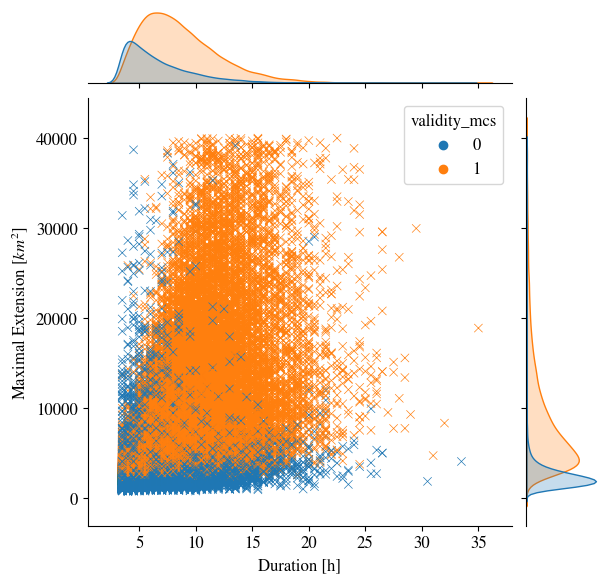

In [33]:
fig = plt.figure(figsize=(10,7))
sns.jointplot(data=df_comparison, x="duration", y="maximal_extension",hue="validity_mcs",  marker='x' )

#r = np.round(df.corr()['duration']['maximal_extension'], 3)
#plt.text(30, 35000, f'r = {r}', color='orange')

plt.xlabel('Duration [h]')
plt.ylabel(r'Maximal Extension [$km^2$]')